# 📊 Capstone Project: Time Series Forecasting of Electricity Consumption for Smart Grid Management

## 🧠 Project Theme
Build a time series model to forecast daily electricity consumption to help a power distribution company manage resources, prevent outages, and optimize energy supply.

---

## 📁 Dataset: Individual Household Electric Power Consumption Data Set

### Source:
[UCI Machine Learning Repository – Household Power Consumption Dataset](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)

### Description:
- Measurements of electric power consumption in one household with a one-minute sampling rate over 4 years (Dec 2006 – Nov 2010).
- Features include: date, time, global active power, voltage, sub-metering values, etc.

---

## 🎯 Business Objective

As a data analyst at a utility company, your goal is to build a **time series forecasting model** that accurately predicts daily electricity demand.

Business Impact:
- Optimize electricity supply.
- Reduce cost of excess power generation.
- Support renewable integration (solar/wind) through forecasting.
- Create an executive dashboard in Tableau Public.

---

## ✅ Deliverables
1. Time Series Forecasting model in Jupyter Notebook.
2. Cleaned and processed dataset (daily level).
3. Tableau Public dashboard link.
4. Final Summary Report with business recommendations.

---


## 📌 Capstone Tasks (Student Instructions)

### 🔹 Task 1: Import Libraries
Import all necessary libraries including:
- `pandas`, `numpy`, `matplotlib`, `seaborn`, `statsmodels`, `prophet`, `sklearn`, etc.

---

In [50]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa import arima
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from prophet import Prophet

from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from IPython import display

### 🔹 Task 2: Load and Explore the Dataset
- Load the dataset using `pandas`.
- Check basic statistics, column types, and null values.

---

In [51]:
df = pd.read_csv(r"../../Power_Consumption/data/household_power_consumption.txt", sep=';', low_memory=False)
df.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000         17.0000  
1           23.000          0.000          1.000         16.0000  
2           23.000          0.000          2.000         17.0000  
3           23.000          0.000          1.000         17.0000  
4           15.800          0.000          1.000         17.0000

### Dataset Information

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes: 
1. **(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3)** represents the active energy consumed every minute (in **watt hour**) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.  
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.  

#### Data Dictionary

1. date: Date in format dd/mm/yyyy  
2. time: time in format hh:mm:ss  
3. global_active_power: household global **minute-averaged** active power (in kW)  
4. global_reactive_power: household global **minute-averaged** reactive power (in kW)  
5. voltage: minute-averaged voltage (in volt)  
6. global_intensity: household global **minute-averaged** current intensity (in ampere)  
7. sub_metering_1: energy sub-metering No. 1 (in **watt-hour** of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).  
8. sub_metering_2: energy sub-metering No. 2 (in **watt-hour** of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.  
9. sub_metering_3: energy sub-metering No. 3 (in **watt-hour** of active energy). It corresponds to an electric water-heater and an air-conditioner.  

In [52]:
df.shape

(2075259, 9)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [54]:
df.duplicated().sum()

0

### 🔹 Task 3: Data Cleaning and Preprocessing
- Parse the `Date` and `Time` into a combined datetime column.
- Remove rows with missing or malformed data.

---

In [55]:
date = df['Date'] + " " + df['Time']
df['Date'] = pd.to_datetime(date, dayfirst=True)
df.drop('Time', axis=1, inplace=True)
df.head()

Date Global_active_power Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00               4.216                 0.418  234.840   
1 2006-12-16 17:25:00               5.360                 0.436  233.630   
2 2006-12-16 17:26:00               5.374                 0.498  233.290   
3 2006-12-16 17:27:00               5.388                 0.502  233.740   
4 2006-12-16 17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000         17.0000  
1           23.000          0.000          1.000         16.0000  
2           23.000          0.000          2.000         17.0000  
3           23.000          0.000          1.000         17.0000  
4           15.800          0.000          1.000         17.0000

In [56]:
df.isnull().sum()

Date                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [57]:
# Could have used iterative imputer to fill the na values but the ratio is only 1.25% (25979/2075259*100) so dropped those.
df.dropna(inplace=True)

### 🔹 Task 4: Resample to Daily Consumption
- Aggregate power consumption (`Global_active_power`) to daily values in kWh.

---

In [58]:
consumption_df = df[['Date','Global_active_power']].copy()
consumption_df.replace('?', np.nan, inplace=True)
consumption_df = consumption_df.astype({'Global_active_power': float})
consumption_df['Date'] = pd.to_datetime(consumption_df['Date'])
consumption_df.set_index('Date', inplace=True)
consumption_df = consumption_df.resample('D').sum()/60
consumption_df.columns = ['Global_active_power_kWh']
consumption_df.head()

Global_active_power_kWh
Date                               
2006-12-16                  20.1529
2006-12-17                  56.5077
2006-12-18                  36.7304
2006-12-19                  27.7699
2006-12-20                  37.0958

### 🔹 Task 5: Create New Time Features
- Extract `Day`, `Month`, `Weekday`, and `Year` for exploratory purposes.

---

In [59]:
df_tab = pd.DataFrame(index=consumption_df.index)
df_tab['Year'] = consumption_df.index.year
df_tab['Month'] = consumption_df.index.month
df_tab['Day'] = consumption_df.index.day
df_tab['Weekday'] = consumption_df.index.day_name()   # Gives full name like 'Monday'
df_tab['Weekday_Num'] = consumption_df.index.weekday
df_tab['Global_active_power_kWh'] = consumption_df['Global_active_power_kWh']
# df_tab['Global_intensity'] = df['Global_intensity']
# df_tab['Global_reactive_power'] = df['Global_reactive_power']
# df_tab['Sub_metering_1'] = df['Sub_metering_1']
# df_tab['Sub_metering_2'] = df['Sub_metering_2']
# df_tab['Sub_metering_3'] = df['Sub_metering_3']
# df_tab['Voltage'] = df['Voltage']

# df_tab.to_csv(r"../../Power_Consumption/tableau/Preprocessed_household_power_consumption.csv")  -- Not required
df_tab.head(3)

Year  Month  Day   Weekday  Weekday_Num  Global_active_power_kWh
Date                                                                        
2006-12-16  2006     12   16  Saturday            5                  20.1529
2006-12-17  2006     12   17    Sunday            6                  56.5077
2006-12-18  2006     12   18    Monday            0                  36.7304

### 🔹 Task 6: Visualize Daily Demand
- Line plot of daily electricity demand over time.
- Highlight yearly and monthly patterns.

#### Clarification:
- Per data dict active energy consumed every minute in kW is: global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3
- But, we already have aggregated the data using resample above which already gave us Global_active_power in kW for whole day (24 Hours)
- S0, daily other electricity consumption in Wh is: global_active_power*1000 - sub_metering_1 - sub_metering_2 - sub_metering_3
- We first plot the other electricity consumption in Wh for day, month, and a year.
- Further we'll plot the other electricity demand in kW for day, month, and a year (demand is max Global_active_power in a day/month/year).
---

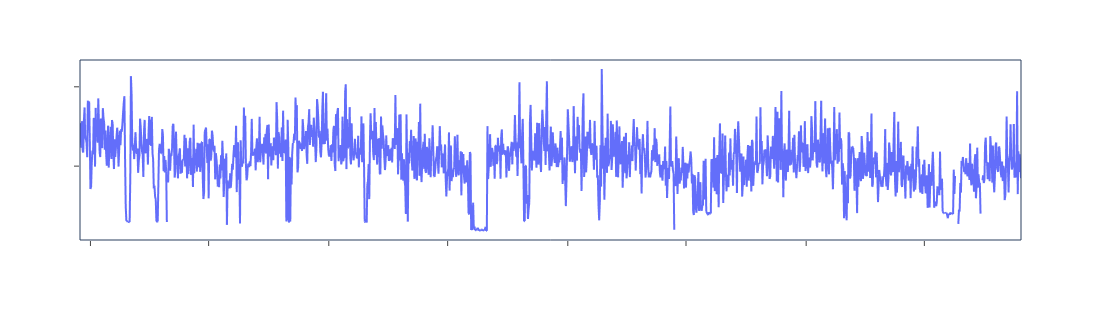

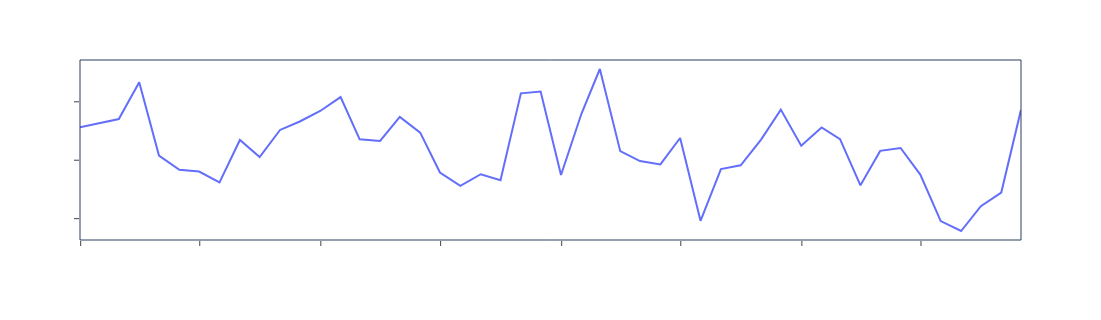

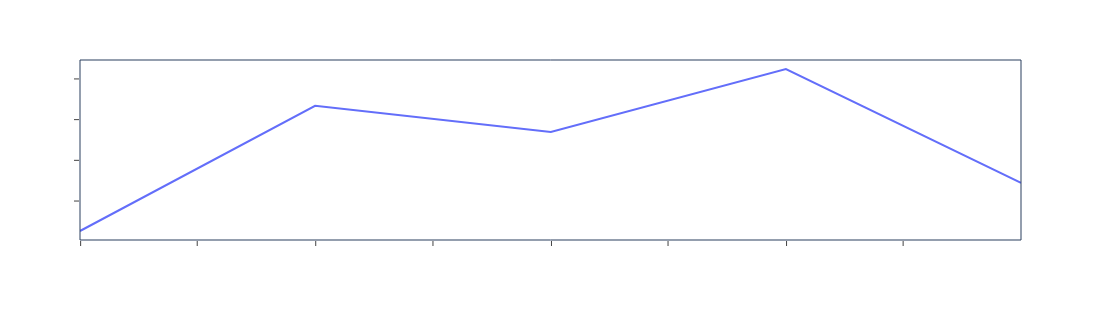

In [60]:
demand_df = pd.DataFrame(df['Global_active_power'])
demand_df.set_index(df['Date'], inplace=True)
demand_df.replace('?', np.nan, inplace=True)
demand_df = demand_df.astype({'Global_active_power': float})
daily_demand = demand_df['Global_active_power'].resample('D').max()
monthly_demand = daily_demand.resample('ME').max()
yearly_demand = daily_demand.resample('YE').max()

shapes=[dict(type='rect', xref='paper', yref='paper', x0=0, x1=1.0, y0=0, y1=1.0, line={'width': 1})]
xaxis=dict(showgrid=False, ticks='outside')
yaxis=dict(showgrid=False, ticks='outside', zeroline=False)

fig = px.line(x=daily_demand.index, y=daily_demand, labels={'x': 'Year', "y": 'Electricity Demand'}, width=1100, height=320)
fig.update_layout(title_text='Daily Electricity Demand', title_x=0.5, xaxis=xaxis, yaxis=yaxis, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='white', shapes=shapes)
fig.show()
fig = px.line(x=monthly_demand.index, y=monthly_demand, labels={'x': 'Year', "y": 'Electricity Demand'}, width=1100, height=320)
fig.update_layout(title_text='Monthly Electricity Demand', title_x=0.5, xaxis=xaxis, yaxis=yaxis, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='white', shapes=shapes)
fig.show()
fig = px.line(x=yearly_demand.index, y=yearly_demand, labels={'x': 'Year', "y": 'Electricity Demand'}, width=1100, height=320)
fig.update_layout(title_text='Yearly Electricity Demand', title_x=0.5, xaxis=xaxis, yaxis=yaxis, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='white', shapes=shapes)
fig.show()

In [61]:
# demand_df = pd.DataFrame(df['Global_active_power'])
# demand_df.set_index(df['Date'], inplace=True)
# demand_df.replace('?', np.nan, inplace=True)
# demand_df = demand_df.astype({'Global_active_power': float})
# demand_per_day = demand_df['Global_active_power'].resample('D').max()
# demand_per_month = demand_per_day.resample('ME').max()
# demand_per_year = demand_per_day.resample('YE').max()

# plt.figure(figsize=(15,3))
# plt.plot(demand_per_day)
# plt.title('Daily Electricity Demand (kW)')
# plt.xlabel('Date')
# plt.ylabel('Electricity Demand (kW)')
# plt.show()

# plt.figure(figsize=(15,3))
# plt.plot(demand_per_month)
# plt.title('Monthly Electricity Demand (kW)')
# plt.xlabel('Date')
# plt.ylabel('Electricity Demand (kW)')
# plt.show()

# plt.figure(figsize=(15,3))
# plt.plot(demand_per_year)
# plt.title('Yearly Electricity Demand (kW)')
# plt.xlabel('Date')
# plt.ylabel('Electricity Demand (kW)')
# plt.show()

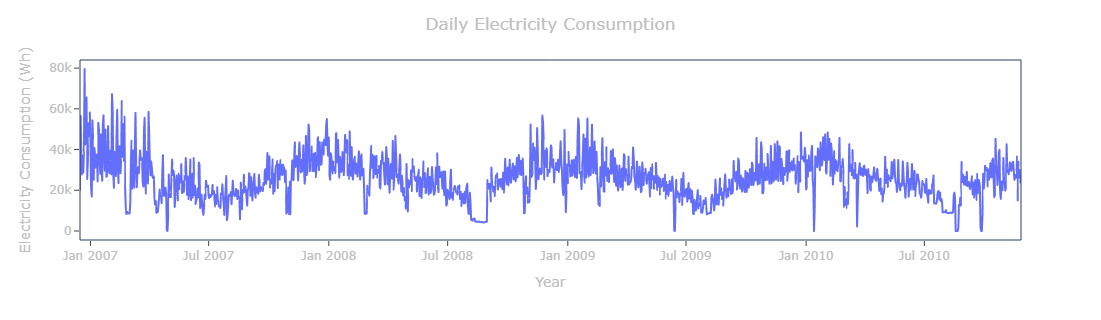

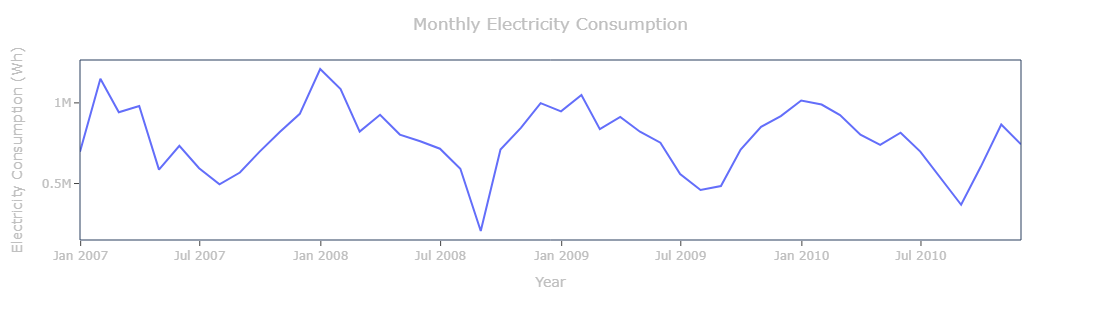

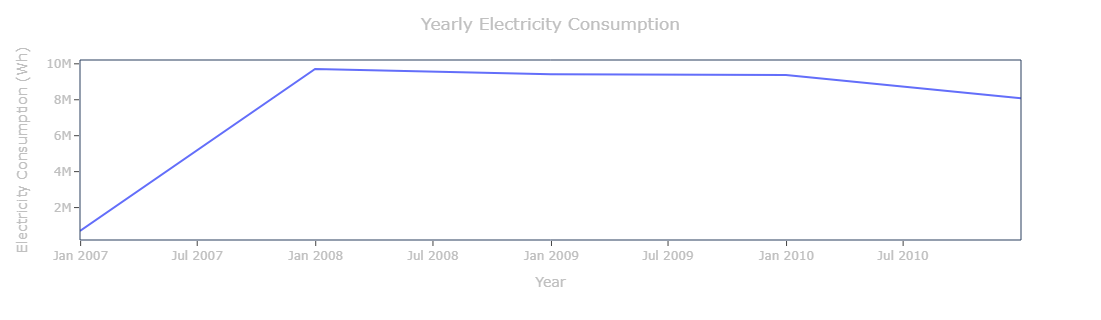

In [62]:
daily_consumption_Wh = consumption_df['Global_active_power_kWh']*1000
monthly_consumption_Wh = daily_consumption_Wh.resample('ME').sum()
yearly_consumption_Wh = daily_consumption_Wh.resample('YE').sum()

fig = px.line(x=daily_consumption_Wh.index, y=daily_consumption_Wh, labels={'x': 'Year', "y": 'Electricity Consumption (Wh)'}, width=1100, height=320)
# fig.update_layout(title_text='Daily Electricity Consumption', title_x=0.5, xaxis_showgrid=False, yaxis_showgrid=False, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='white', shapes=[dict(type='rect', xref='paper', yref='paper', x0=0, x1=1.0, y0=0, y1=1.0, line={'width': 1})])
fig.update_layout(title_text='Daily Electricity Consumption', title_x=0.5, xaxis=xaxis, yaxis=yaxis, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='silver', shapes=shapes)
fig.show()
fig = px.line(x=monthly_consumption_Wh.index, y=monthly_consumption_Wh, labels={'x': 'Year', "y": 'Electricity Consumption (Wh)'}, width=1100, height=320)
fig.update_layout(title_text='Monthly Electricity Consumption', title_x=0.5, xaxis=xaxis, yaxis=yaxis, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='silver', shapes=shapes)
fig.show()
fig = px.line(x=yearly_consumption_Wh.index, y=yearly_consumption_Wh, labels={'x': 'Year', "y": 'Electricity Consumption (Wh)'}, width=1100, height=320)
fig.update_layout(title_text='Yearly Electricity Consumption', title_x=0.5, xaxis=xaxis, yaxis=yaxis, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='silver', shapes=shapes)
fig.show()

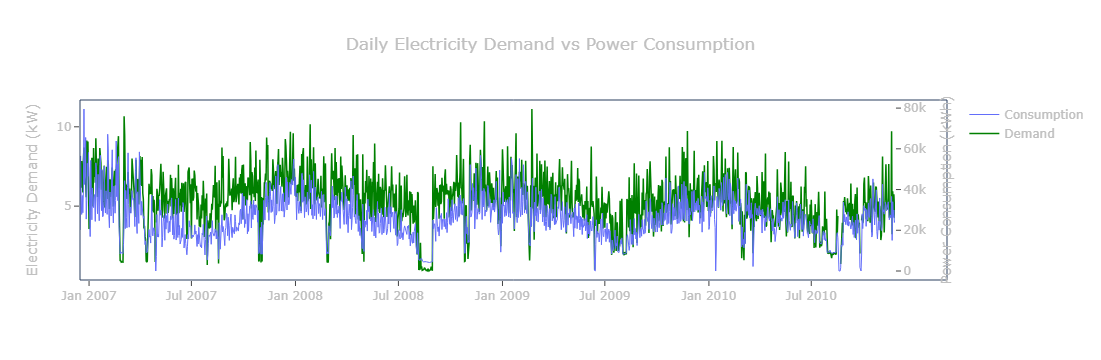

In [65]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=daily_consumption_Wh.index, y=daily_consumption_Wh, line_width=1, name='Consumption'), secondary_y=True)
fig.add_trace(go.Scatter(x=daily_demand.index, y=daily_demand, line_width=1.5, line_color='green', name='Demand'), secondary_y=False)

shapes2 = [dict(type='rect', xref= 'paper', yref= 'paper', x0= 0, x1= 1.0, y0= 0, y1= 1.0, line= {'width': 1})]
yaxis2=dict(showgrid=False, ticks='outside', zeroline=False, side="right")

fig.update_layout(title_text='Daily Electricity Demand vs Power Consumption', title_x=0.5, xaxis=xaxis, yaxis=yaxis, yaxis2=yaxis2, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='silver', shapes=shapes2)
fig.update_yaxes(secondary_y=False, title_text='Electricity Demand (kW)')
fig.update_yaxes(secondary_y=True, title_text='Power Consumption (kWh)')
fig.show()

# fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

### 🔹 Task 7: Decompose Time Series
- Use `seasonal_decompose()` to break the series into:
  - Trend
  - Seasonality
  - Residual

---

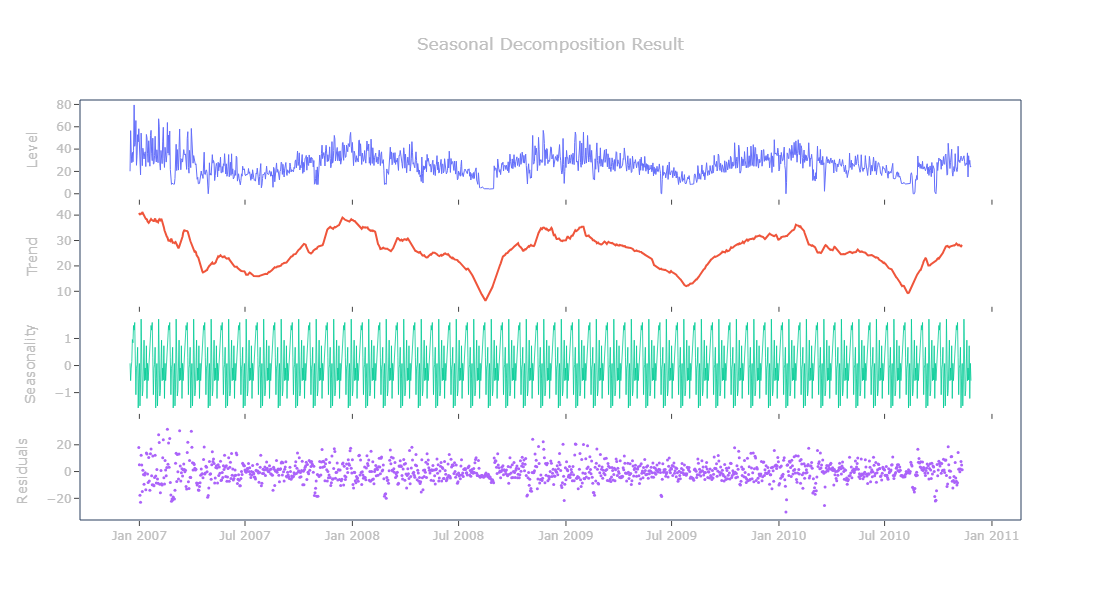

In [67]:

decomposition = seasonal_decompose(consumption_df['Global_active_power_kWh'], model='additive', period=30)
# decomposition.plot()
# plt.show()
trend = decomposition.trend
seasonality = decomposition.seasonal
noise = decomposition.resid

# Seasonal decomposition on separate graph - Not so good looking.
# fig = px.line(x=consumption_df['Global_active_power_kWh'].index, y=consumption_df['Global_active_power_kWh'], labels={'x': 'Year', "y": 'Level'}, width=1100, height=250)
# fig.update_layout(title_text='Seasonal Decomposition Result', title_x=0.5, xaxis=xaxis, yaxis=yaxis, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='white', shapes=shapes)
# fig.show()
# fig = px.line(x=consumption_df['Global_active_power_kWh'].index, y=trend, labels={'x': 'Year', "y": 'Trend'}, width=1100, height=250)
# fig.update_layout(xaxis=xaxis, yaxis=yaxis, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='white', shapes=shapes)
# fig.show()
# fig = px.line(x=consumption_df['Global_active_power_kWh'].index, y=seasonality, labels={'x': 'Year', "y": 'Seaonality'}, width=1100, height=250)
# fig.update_layout(xaxis=xaxis, yaxis=yaxis, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='white', shapes=shapes)
# fig.show()
# fig = px.scatter(x=consumption_df['Global_active_power_kWh'].index, y=noise, labels={'x': 'Year', "y": 'Residuals'}, width=1100, height=250)
# fig.update_layout(xaxis=xaxis, yaxis=yaxis, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='white', shapes=shapes)
# fig.show()


# Seasonal decomposition on single graph object.
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.02)
fig.add_trace(go.Scatter(x=consumption_df['Global_active_power_kWh'].index, y=consumption_df['Global_active_power_kWh'], showlegend=False, line_width=1), row=1, col=1)
fig.add_trace(go.Scatter(x=consumption_df['Global_active_power_kWh'].index, y=trend, showlegend=False, line_width=2), row=2, col=1)
fig.add_trace(go.Scatter(x=consumption_df['Global_active_power_kWh'].index, y=seasonality, showlegend=False, line_width=0.8), row=3, col=1)
fig.add_trace(go.Scatter(x=consumption_df['Global_active_power_kWh'].index, y=noise, showlegend=False, mode='markers', marker_size=3), row=4, col=1)

fig.update_layout(title_text='Seasonal Decomposition Result', title_x=0.5, xaxis=xaxis, xaxis2=xaxis, xaxis3=xaxis, xaxis4=xaxis, yaxis=yaxis, yaxis2=yaxis, yaxis3=yaxis, yaxis4=yaxis, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='silver', shapes=shapes, height=600,)
fig.update_layout(yaxis_title="Level", yaxis2_title="Trend", yaxis3_title="Seasonality", yaxis4_title="Residuals")

fig.show()

## Insights from Seasonal Decomposition result:
#### 1. Trend:
- There is no Trend seen in the series.
#### 2. Seasonality:
- We see two troughs within each month that strongly indicates the presence of an intra-monthly seasonality.
- First challenge is that one trough little bit small than other and that happens in a lag of 9-10 days.
- Another one is that the seasonality is consistant but shifting backwards slowly (9-10 days yearly).
#### 3. Noise:
- It can be seen that there is some fluctuations in noise which is expected but there is no trend/pattern or nor outliers.
- Magnitude of the noise also suggests that the series has high variability.

### 🔹 Task 8: Rolling Statistics and Stationarity
- Plot rolling mean and std.
- Perform ADF test to check stationarity.

---

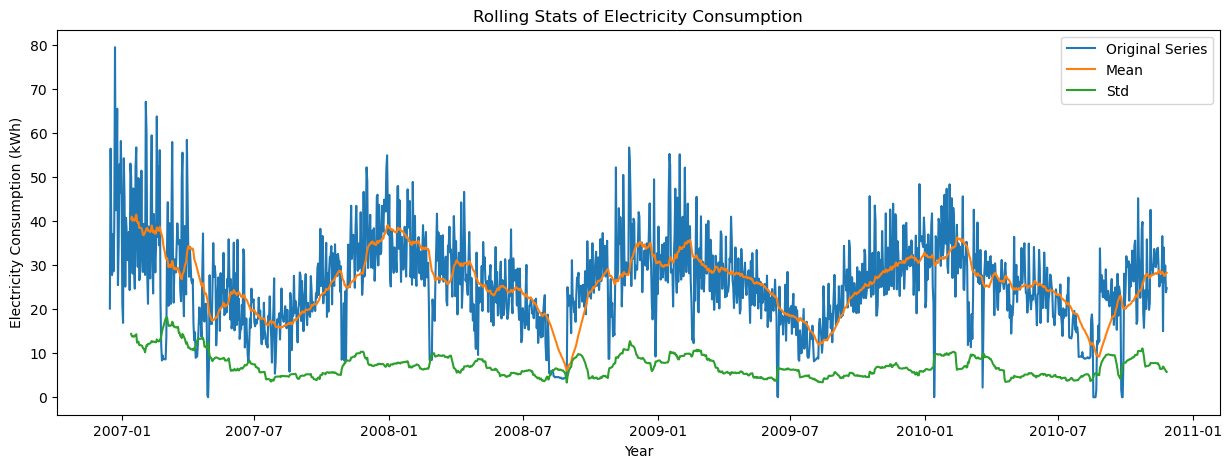

In [68]:
rolling_mean = consumption_df['Global_active_power_kWh'].rolling(window=30).mean()
rolling_std = consumption_df['Global_active_power_kWh'].rolling(window=30).std()

plt.figure(figsize=(15,5))
plt.plot(consumption_df['Global_active_power_kWh'])
plt.plot(rolling_mean)
plt.plot(rolling_std)
plt.title("Rolling Stats of Electricity Consumption")
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (kWh)')
plt.legend(["Original Series", 'Mean', "Std"])
plt.show()

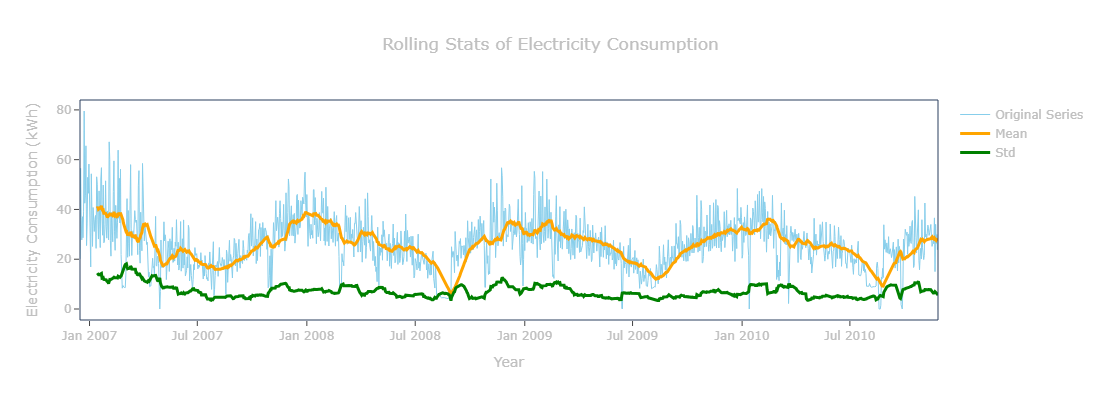

In [73]:
fig = go.Figure()

# Original Series
fig.add_trace(go.Scatter(x=consumption_df.index, y=consumption_df['Global_active_power_kWh'], mode='lines', name='Original Series', line=dict(color='skyblue', width=1)))

# Rolling Mean
fig.add_trace(go.Scatter(x=consumption_df.index, y=rolling_mean, mode='lines', name='Mean', line=dict(color='orange', width=3)))

# Rolling Std Dev
fig.add_trace(go.Scatter(x=consumption_df.index, y=rolling_std, mode='lines', name='Std', line=dict(color='green', width=3)))

fig.update_layout(title='Rolling Stats of Electricity Consumption', title_x=0.5, xaxis=dict(title='Year', showgrid=False, ticks='outside'), yaxis =dict(title='Electricity Consumption (kWh)', showgrid=False, zeroline=False, ticks='outside'), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='silver', width=1100, height=400, shapes=shapes)
fig.show()


In [74]:
# Stationarity Checks:


result = adfuller(consumption_df['Global_active_power_kWh'])
print(f'ADF Statistic: \t{result[0]}')
print(f'p-value: \t{result[1]}')
print('\nCritical Values:')
for key, value in result[4].items():
    print(f'   \t\t{key}: {value}')
if result[1] < 0.05:
    print("\nSeries is Stationary (Not enough evidence to accept the null hypothesis)")
else:
    print("\nSeries is Non-stationary (failed to reject null hypothesis)")
print()

ADF Statistic: 	-3.8497769421633437
p-value: 	0.002437177429858446

Critical Values:
   		1%: -3.434966750462565
   		5%: -2.8635789736973725
   		10%: -2.5678555388041384

Series is Stationary (Not enough evidence to accept the null hypothesis)



### 🔹 Task 9: Differencing
- Apply differencing to make the series stationary if needed.

---

In [75]:
# -- Not reuired as series is already stationary. so we got d here as 0.

### 🔹 Task 10: ACF and PACF Plots
- Plot Auto-Correlation and Partial Auto-Correlation to guide model selection.

---

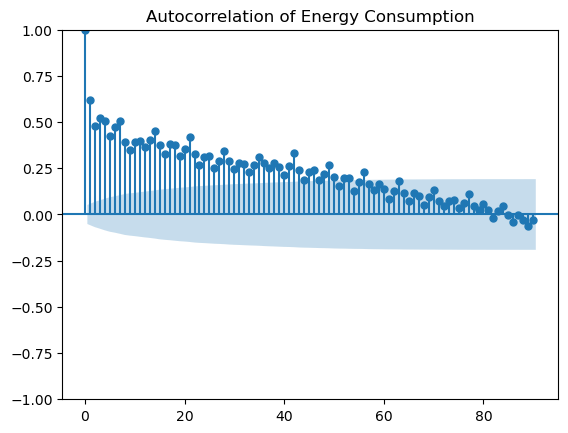

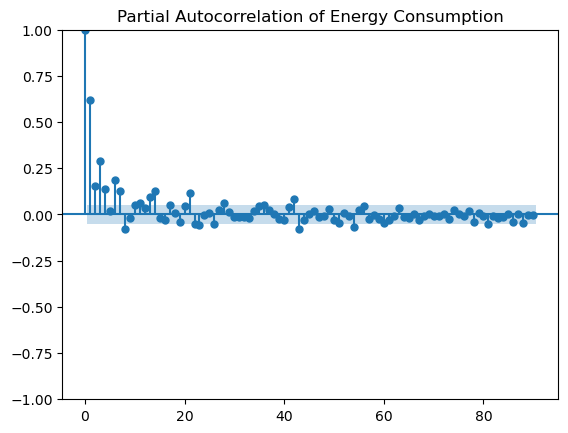

In [76]:

plot_acf(consumption_df['Global_active_power_kWh'], lags=90)
plt.title("Autocorrelation of Energy Consumption")
plt.show()

plot_pacf(consumption_df['Global_active_power_kWh'], lags=90)
plt.title("Partial Autocorrelation of Energy Consumption")
plt.show()


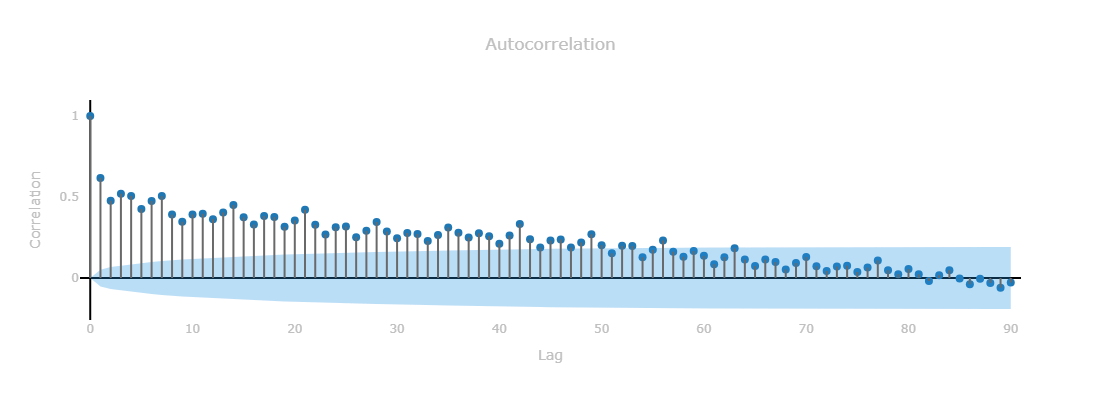

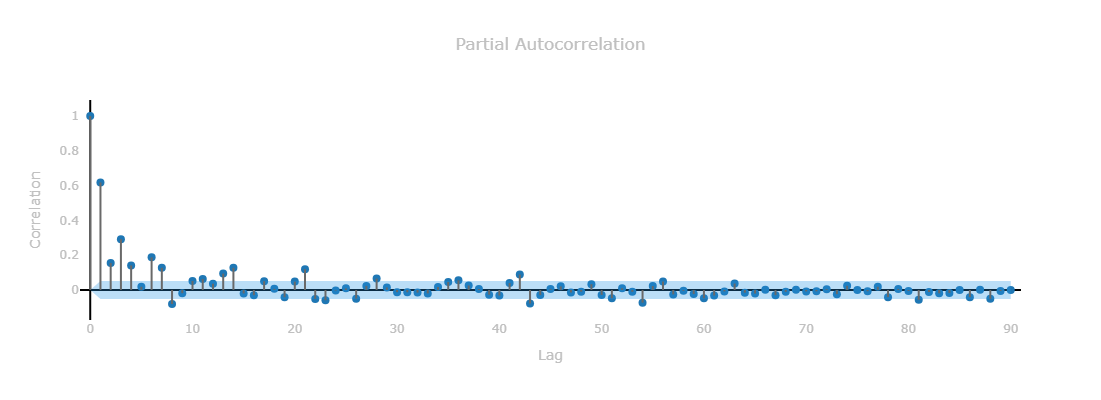

In [80]:
def plot_corr(series, kind='acf', lags=40):
    func = pacf if kind == 'pacf' else acf
    corr, confint = func(series.dropna(), alpha=0.05, nlags=lags)
    lower, upper = confint[:,0] - corr, confint[:,1] - corr

    fig = go.Figure()

    [fig.add_shape(type='line', x0=x, y0=0, x1=x, y1=y, line=dict(color='dimgray')) for x, y in enumerate(corr)]

    # [fig.add_scatter(x=(x,x), y=(0,corr_array[0][x]), mode='lines',line_color='#3f3f3f') for x in range(len(corr_array[0]))]

    fig.add_trace(go.Scatter(x=np.arange(len(corr)), y=corr, mode='markers', marker=dict(color='#1f77b4', size=8)))

    # Confidence interval
    fig.add_trace(go.Scatter(x=np.arange(len(corr)), y=upper, mode='lines', line_color='rgba(255,255,255,0)'))
    fig.add_trace(go.Scatter(x=np.arange(len(corr)), y=lower, mode='lines',
                             fill='tonexty', fillcolor='rgba(32,146,230,0.3)', line_color='rgba(255,255,255,0)'))

    fig.update_layout(title=f"{'Partial ' if kind=='pacf' else ''}Autocorrelation", title_x=0.5, 
                      xaxis=dict(title='Lag', range=[-1, lags+1], showgrid=False, zerolinecolor='black'), 
                      yaxis =dict(title='Correlation', showgrid=False, zerolinecolor='black'),
                      showlegend=False,
                      paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', font_color='silver', width=1100, height=400)
    
    fig.show()

plot_corr(consumption_df, kind='acf', lags=90)
plot_corr(consumption_df, kind='pacf', lags=90)

### PACF and ACF graph cleary shows that this is an AR(p) model.
- where,
  - p should be 1/2/3/4/6/7/8 as per PACF plot
  - d is 0 as no integration/diff() as ADF test for stationarity — p-value 0.002.
  - q should be 0 as per ACF plot because it is fradually decaying and not depleting sharply.
  - #### So this wuold be AR(p) model but as we already have confirmed seasonality we'll go with SARIMA/SARIMAX models.


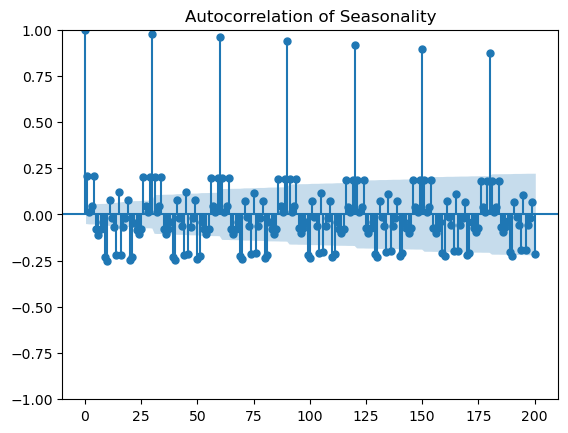

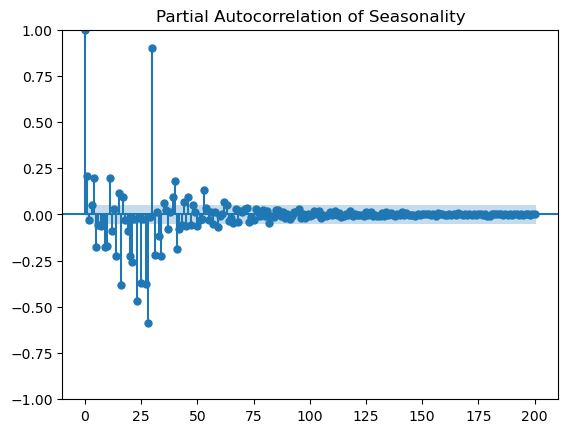

In [81]:
# To proceed with SARIMA/SARIMAX model we also need to find P, D, Q with the help of ACF/PACF plots of Seasonality:
plot_acf(seasonality, lags=200)
plt.title("Autocorrelation of Seasonality")
plt.savefig('Seasonality ACF')
plt.show()

plot_pacf(seasonality, lags=200)
plt.title("Partial Autocorrelation of Seasonality")
plt.savefig('Seasonality PACF')
plt.show()

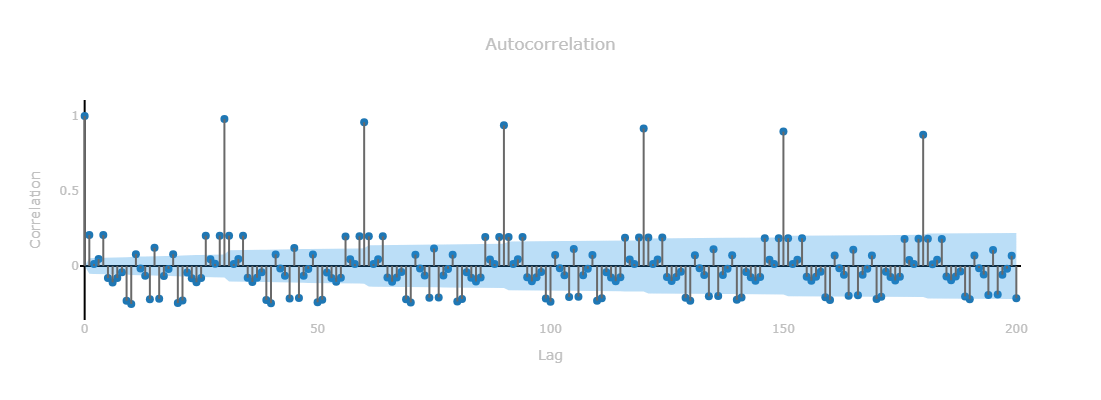

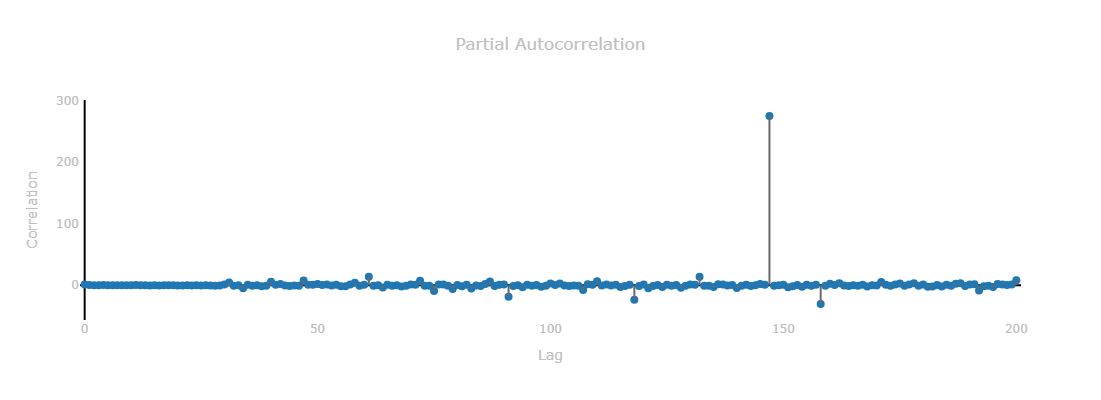

In [82]:
plot_corr(seasonality, kind='acf', lags=200)
plot_corr(seasonality, kind='pacf', lags=200)

## Insights from ACF\PACF plots of Seasonality Series:

#### 1. Seasonality:
- We see big spikes at lag 30, 60, 90 and so on... This again confirms that seasonal period (s) should be 30.
#### 2. P from PACF plot:
- Strong spike at lag 1 and again at lag 30 which suggests Seasonal AR part P = 1.
#### 3. Difference (D):
- No lag so D is again 0.
#### 4. Q from ACF plot:
- Q should be 0 or 1 as ACF plot gradually reducing after each lag 30 and also shows sharp decline after lag 1.

### So, possible combinations for SARIMA model would be: 
- order=(p=1 to 4 or 6 to 8, d=0, q=0) and seasonal_order=(P=1, D=0, Q=0 or 1, s=30)

### 🔹 Task 11: Train-Test Split
- Use last 6 months or 20% as the test set.
- Maintain time order (do not shuffle).

---

In [83]:
y = consumption_df['Global_active_power_kWh']
train_size = int(len(y) * 0.8)
df_train, df_test = y[0:train_size], y[train_size:]

df_train.shape, df_test.shape

((1153,), (289,))

### 🔹 Task 12: Build ARIMA or SARIMA Model
- Choose p, d, q parameters from ACF/PACF.
- Fit SARIMA for daily level data.

---

In [84]:
p_values = [1, 2, 3, 4, 6, 7, 8]
d = 0
q = 0

P = 1
D = 0
Q_values = [0, 1]
s = 30

results = []

for p in p_values:
    for Q in Q_values:
        try:
            model = SARIMAX(df_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_stationarity=False, enforce_invertibility=False)
            result = model.fit(disp=False)
            print(f'order=({p},{d},{q}), seasonal_order=({P},{D},{Q},{s}) --> AIC: {result.aic:.2f}')
            
            results.append({
                'order': (p, d, q),
                'seasonal_order': (P, D, Q, s),
                'aic': result.aic
            })
        except Exception as e:
            print(f'Failed for order=({p},{d},{q}), seasonal_order=({P},{D},{Q},{s}) -- {e}')

# Convert result to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='aic').reset_index(drop=True)

# Show top models
print("\nTop models by AIC:")
print(results_df.head())


order=(1,0,0), seasonal_order=(1,0,0,30) --> AIC: 8073.56
order=(1,0,0), seasonal_order=(1,0,1,30) --> AIC: 8090.23
order=(2,0,0), seasonal_order=(1,0,0,30) --> AIC: 7964.47
order=(2,0,0), seasonal_order=(1,0,1,30) --> AIC: 7960.80
order=(3,0,0), seasonal_order=(1,0,0,30) --> AIC: 7796.46
order=(3,0,0), seasonal_order=(1,0,1,30) --> AIC: 7793.60
order=(4,0,0), seasonal_order=(1,0,0,30) --> AIC: 7737.47
order=(4,0,0), seasonal_order=(1,0,1,30) --> AIC: 7737.21
order=(6,0,0), seasonal_order=(1,0,0,30) --> AIC: 7667.12
order=(6,0,0), seasonal_order=(1,0,1,30) --> AIC: 7668.63
order=(7,0,0), seasonal_order=(1,0,0,30) --> AIC: 7614.49
order=(7,0,0), seasonal_order=(1,0,1,30) --> AIC: 7615.45
order=(8,0,0), seasonal_order=(1,0,0,30) --> AIC: 7599.06
order=(8,0,0), seasonal_order=(1,0,1,30) --> AIC: 7598.86

Top models by AIC:
       order seasonal_order       aic
0  (8, 0, 0)  (1, 0, 1, 30) 7598.8637
1  (8, 0, 0)  (1, 0, 0, 30) 7599.0624
2  (7, 0, 0)  (1, 0, 0, 30) 7614.4865
3  (7, 0, 0)  (1

In [85]:
# So at this point our best optimal model is:
sarima_model = SARIMAX(df_train, order=(8, 0, 0), seasonal_order=(1, 0, 1, 30), enforce_stationarity=False, enforce_invertibility=False)
fitted_sarima_model = sarima_model.fit(disp=False)

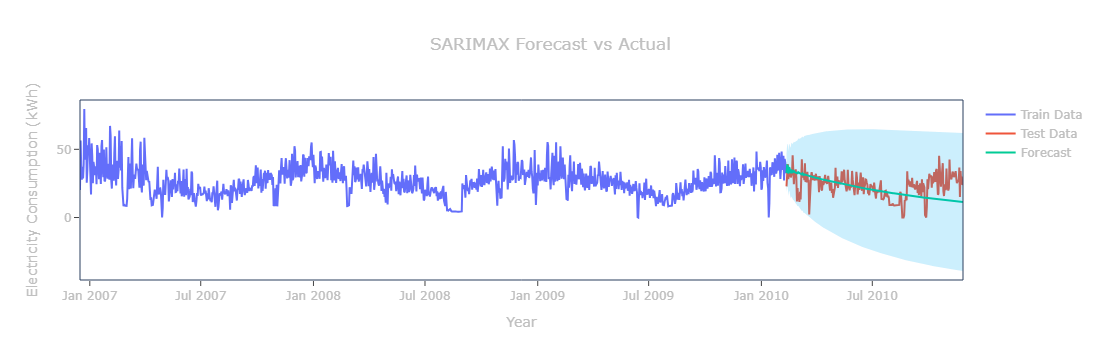

In [86]:
# Forecast and plot it:
sarima_forecast = fitted_sarima_model.get_forecast(steps=289)
sarima_forecast_mean = sarima_forecast.predicted_mean
sarima_forecast_ci = sarima_forecast.conf_int()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_train.index, y=df_train, mode='lines', name='Train Data'))
fig.add_trace(go.Scatter(x=df_test.index, y=df_test, mode='lines', name='Test Data'))
fig.add_trace(go.Scatter(x=df_test.index, y=sarima_forecast_mean, mode='lines', name='Forecast'))

# Confidence interval
fig.add_trace(go.Scatter(
    x=df_test.index.tolist() + df_test.index[::-1].tolist(),
    y=sarima_forecast_ci.iloc[:, 0].tolist() + sarima_forecast_ci.iloc[:, 1][::-1].tolist(),
    fill='toself',
    fillcolor='rgba(0,176,246,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=False
))

# fig.update_layout(title="SARIMAX Forecast vs Actual",
#                   xaxis_title="Year",
#                   yaxis_title="Electricity Consumption (kWh)",
#                   template="plotly_dark")
fig.update_layout(title="SARIMAX Forecast vs Actual", title_x=0.5, xaxis=dict(title='Year', showgrid=False, ticks='outside'), yaxis =dict(title='Electricity Consumption (kWh)', ticks='outside', showgrid=False, zeroline=False), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', shapes=shapes, font_color='silver')

fig.show()


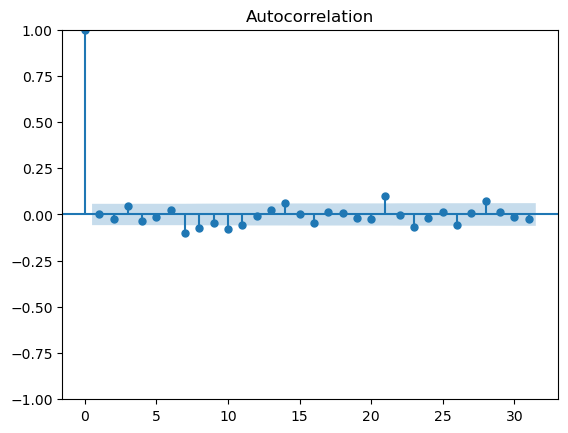

In [87]:
# Check residuals of best_model to confirm that no significant lags means no correlation:
plot_acf(fitted_sarima_model.resid)
plt.show()

In [88]:
plot_corr(fitted_sarima_model.resid, kind='acf', lags=30)
plot_corr(fitted_sarima_model.resid, kind='pacf', lags=30)

### 🔹 Task 13: Evaluate Forecasting Performance
- Use RMSE, MAE, MAPE to evaluate model predictions on the test set.

---

In [89]:
y_pred = sarima_forecast.tvalues[0:289]
sarima_mse = mean_squared_error(df_test, y_pred)
sarima_mae = mean_absolute_error(df_test, y_pred)
sarima_mape = mean_absolute_percentage_error(df_test, y_pred)
sarima_rmse = np.sqrt(mean_squared_error(df_test, y_pred))
result_metric = pd.DataFrame(index=['mse', 'mae', 'mape', 'rmse'])
result_metric['SARIMAX'] = [sarima_mse, sarima_mae, sarima_mape, sarima_rmse]

print("Evaluation Metric of SARIMAX Model:")
print(f'MSE\t: {sarima_mse:.2f}')
print(f'MAE\t: {sarima_mae:.2f}')
print(f'MAPE\t: {sarima_mape:.2f}')
print(f'RMSE\t: {sarima_rmse:.2f}')

Evaluation Metric of SARIMAX Model:
MSE	: 555.24
MAE	: 22.13
MAPE	: 61177632153903.80
RMSE	: 23.56


### 🔹 Task 14: Facebook Prophet Forecasting
- Train Prophet model on the full series.
- Plot future forecast for the next 30 days.

---

08:57:24 - cmdstanpy - INFO - Chain [1] start processing
08:57:24 - cmdstanpy - INFO - Chain [1] done processing


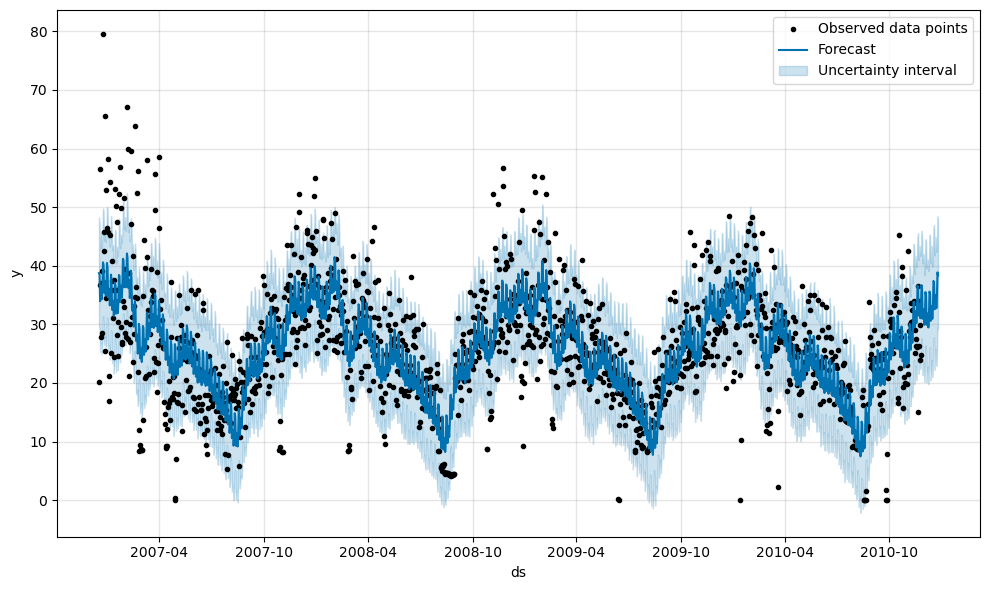

In [90]:
# Prophet model trained on full series:

# Prepare data
df_prophet = consumption_df.reset_index()[['Date', 'Global_active_power_kWh']]
df_prophet.columns = ['ds', 'y']

# Initialize model
prophet_model = Prophet()

# Fit to data
prophet_model.fit(df_prophet)

# Create future dates
future = prophet_model.make_future_dataframe(periods=30)

# Forecast
prophet_forecast = prophet_model.predict(future)

# Plot forecast
fig = prophet_model.plot(prophet_forecast, include_legend=True)


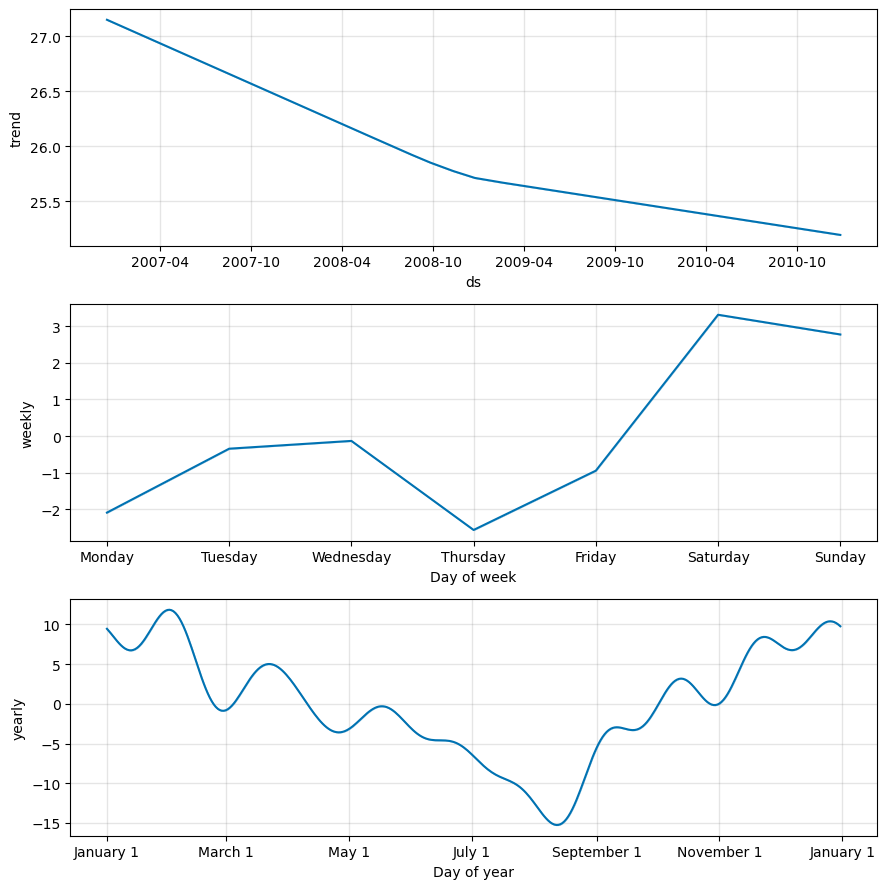

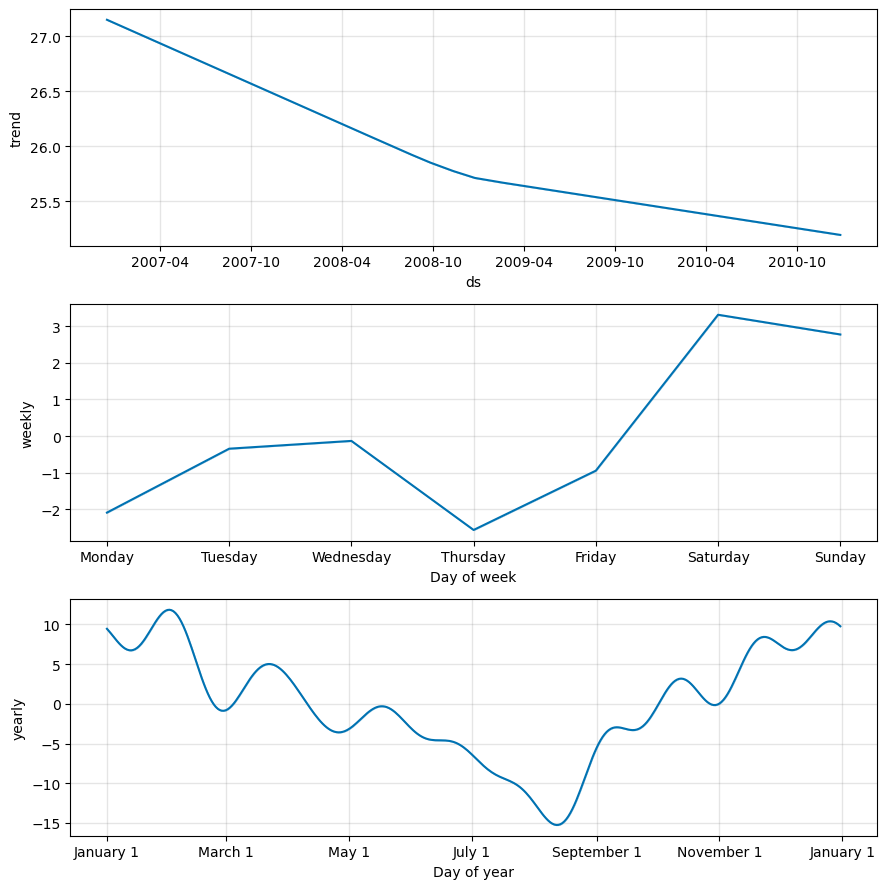

In [91]:
# Check residuals of best_model to confirm that no significant lags means no correlation:
prophet_model.plot_components(fcst=prophet_forecast, weekly_start=1)

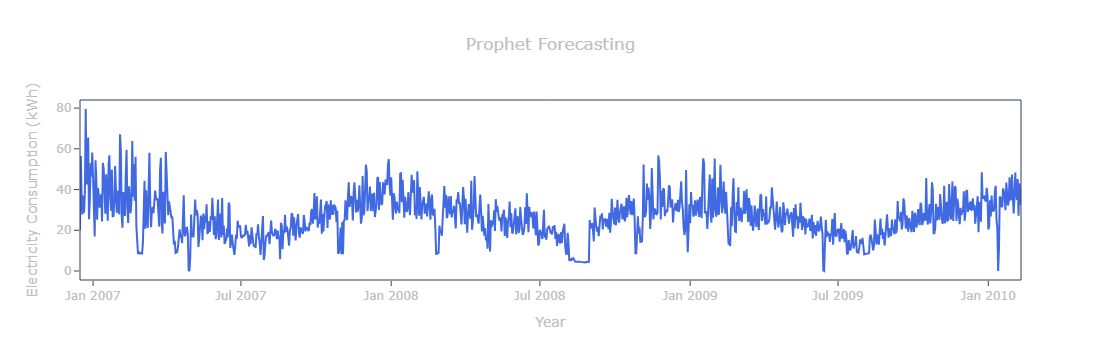

In [101]:

# Actual data trace
actual_trace = go.Scatter(x=consumption_df.index, y=df_prophet['y'], mode='lines', name='Actual Data', line=dict(color='royalblue'))

# Forecasted data trace
forecast_trace = go.Scatter(x=prophet_forecast['ds'].iloc[1442:], y=prophet_forecast['yhat'].iloc[1442:], mode='lines', name='Forecast', line=dict(color='firebrick'))

layout = go.Layout(title="Prophet Forecasting", title_x=0.5, xaxis=dict(title='Year', showgrid=False, ticks='outside'), yaxis =dict(title='Electricity Consumption (kWh)', ticks='outside', showgrid=False, zeroline=False), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', shapes=shapes, font_color='silver')
fig = go.Figure(data=[actual_trace, forecast_trace], layout=layout)
fig.show()

### 🔹 Task 14.1: Facebook Prophet Forecasting on Test Data -- Additional step
- Train Prophet model on the Train series.
- Plot future forecast for the length of datapoints in Test series.

---

08:57:26 - cmdstanpy - INFO - Chain [1] start processing
08:57:26 - cmdstanpy - INFO - Chain [1] done processing


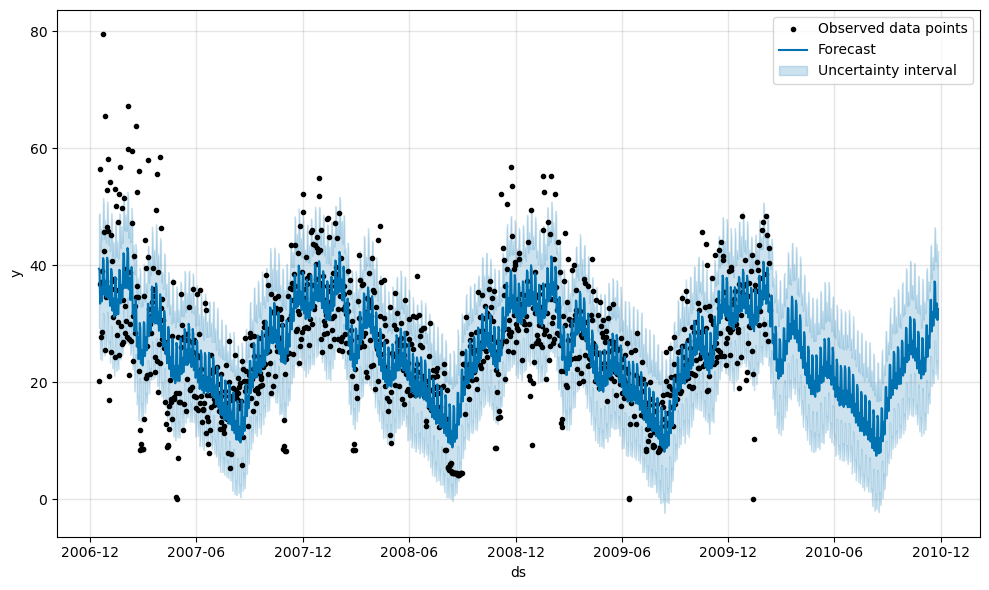

In [93]:
# Prepare data
df_prophet = df_train.reset_index()[['Date', 'Global_active_power_kWh']]
df_prophet.columns = ['ds', 'y']

# Initialize model
prophet_model = Prophet()

# Fit to data
prophet_model.fit(df_prophet)

# Create future dates
future = prophet_model.make_future_dataframe(periods=289)

# Forecast
prophet_forecast = prophet_model.predict(future)

# Plot forecast
fig = prophet_model.plot(prophet_forecast, include_legend=True)

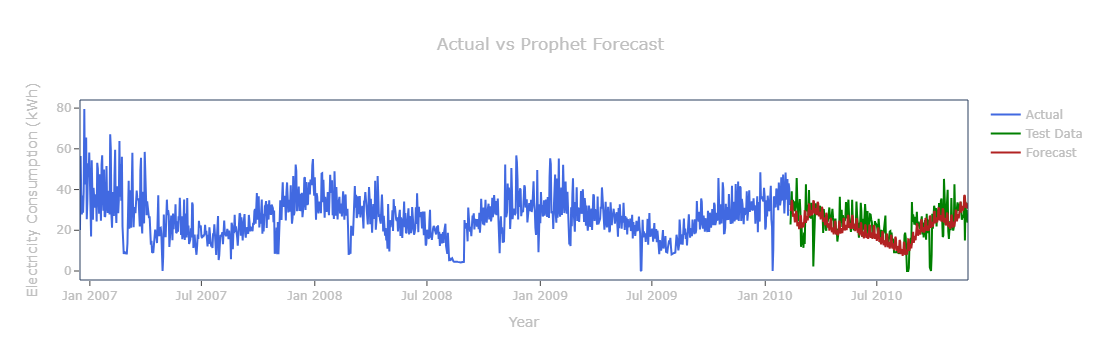

In [102]:

# Actual data trace
actual_trace = go.Scatter(x=df_prophet['ds'], y=df_prophet['y'], mode='lines', name='Actual', line=dict(color='royalblue'))

test_trace = go.Scatter(x=df_test.index, y=df_test, mode='lines', name='Test Data', line=dict(color='green'))

# Forecasted data trace
forecast_trace = go.Scatter(x=prophet_forecast['ds'].iloc[1153:], y=prophet_forecast['yhat'].iloc[1153:], mode='lines', name='Forecast', line=dict(color='firebrick'))

layout = go.Layout(title="Actual vs Prophet Forecast", title_x=0.5, xaxis=dict(title='Year', showgrid=False, ticks='outside'), yaxis =dict(title='Electricity Consumption (kWh)', ticks='outside', showgrid=False, zeroline=False), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', shapes=shapes, font_color='silver')
fig = go.Figure(data=[actual_trace, test_trace, forecast_trace], layout=layout)
fig.show()

In [95]:
y_pred = prophet_forecast['yhat'][:289]
prophet_mse = mean_squared_error(df_test, y_pred)
prophet_mae = mean_absolute_error(df_test, y_pred)
prophet_mape = mean_absolute_percentage_error(df_test, y_pred)
prophet_rmse = np.sqrt(mean_squared_error(df_test, y_pred))

result_metric['Prophet'] = [prophet_mse, prophet_mae, prophet_mape, prophet_rmse]

print("Evaluation Metric of SARIMAX Model:")
print(f'MSE\t: {prophet_mse:.2f}')
print(f'MAE\t: {prophet_mae:.2f}')
print(f'MAPE\t: {prophet_mape:.2f}')
print(f'RMSE\t: {prophet_rmse:.2f}')

Evaluation Metric of SARIMAX Model:
MSE	: 107.37
MAE	: 8.41
MAPE	: 1835243223510714.25
RMSE	: 10.36


### 🔹 Task 15: Compare Models
- Compare ARIMA vs Prophet performance on the same test set.
- Discuss tradeoffs.

---

In [96]:
# Comparision of SARIMA vs Prophet metrics:
pd.options.display.float_format = '{:.4f}'.format

result_metric.to_csv("../../Power_Consumption/tableau/result_metric.csv")
result_metric

SARIMAX               Prophet
mse             555.2368              107.3683
mae              22.1335                8.4074
mape 61177632153903.7969 1835243223510714.2500
rmse             23.5635               10.3619

### Key tradeoffs observed:
 - Accuracy: Prophet outperformed SARIMAX on all error metrics (MSE, MAE, RMSE) in this case, providing more reliable forecasts.
 - Ease of Use: Prophet required minimal manual tuning, automatically handling seasonality and trends. SARIMAX needed detailed analysis (stationarity checks, ACF/PACF plots, parameter tuning).
 - Interpretability & Deployment: Prophet offered intuitive trend and seasonality visualizations, making it more suitable for operational and managerial reporting. SARIMAX, while highly customizable, was comparatively complex to interpret and maintain.
 - Performance on Long-term Forecast: Prophet maintained forecast stability without sharp convergence, while SARIMAX showed limitations over extended horizons and converged within a year if we use d/D = 0.

### Recommendation:
 - Given the project’s focus on forecast accuracy, ease of maintenance, and interpretability, Prophet is the preferred model for this use case.

### 🔹 Task 16: Anomaly Detection
- Use residuals or Z-score to flag anomalies.
- Visualize abnormal days in the dataset.

---

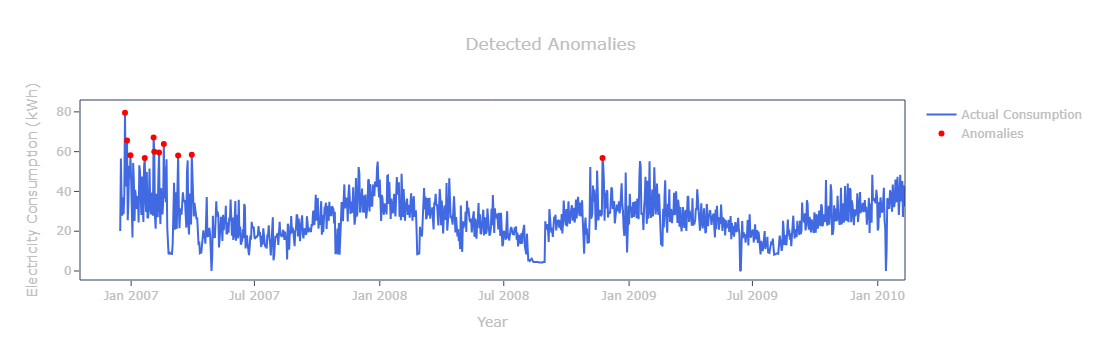

In [103]:

z_scr = zscore(consumption_df['Global_active_power_kWh'])
anomalies = (z_scr[(z_scr > 3) | (z_scr < -3)]).dropna()
actual_data = consumption_df[consumption_df.index.isin(anomalies.index)]
fig = go.Figure()

# Actual time series
fig.add_trace(go.Scatter(x=df_prophet['ds'], y=df_prophet['y'], mode='lines', name='Actual Consumption', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=actual_data.index, y=actual_data['Global_active_power_kWh'], mode='markers', marker=dict(color='red'), name='Anomalies'))

# Anomalies as markers
# fig.add_trace(go.Scatter(x=anomalies.index, y=anomalies, mode='markers', name='Detected Anomalies', marker=dict(color='red')))

fig.update_layout(title="Detected Anomalies", title_x=0.5, xaxis=dict(title='Year', showgrid=False, ticks='outside'), yaxis =dict(title='Electricity Consumption (kWh)', ticks='outside', showgrid=False, zeroline=False), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', shapes=shapes, font_color='silver')
fig.show()

### 🔹 Task 17: Prepare Data for Tableau
- Export a CSV file with:
  - `Date`, `Actual_Consumption`, `Predicted_Consumption`, `Anomaly_Flag`, and `Day_of_Week`.

---

In [98]:
# We'll consider Prophet model as per recommendations:
forecast_tab = pd.DataFrame(columns=['Daily_Demand', 'Actual_Consumption', 'Prophet_Prediction', 'SARIMAX_Prediction', 'Anomaly_Flag', 'Day_of_Week'], index=consumption_df.index)

forecast_tab['Daily_Demand'] = daily_demand  # Extra as Demand and Consumptions are two separate fields.
forecast_tab['Actual_Consumption'] = consumption_df['Global_active_power_kWh']
forecast_tab['Prophet_Prediction'] = pd.concat([df_train, pd.Series(prophet_forecast['yhat'][1153:].to_list(), index=df_test.index)])
forecast_tab['SARIMAX_Prediction'] = pd.concat([df_train, pd.Series(sarima_forecast.tvalues)])
forecast_tab['Anomaly_Flag'] = consumption_df[consumption_df.index.isin(anomalies.index)]
forecast_tab['Day_of_Week'] = forecast_tab.index.day_name()
# forecast_tab.isnull().sum()  # As we know we already have detected anomalies (11 days) this df contains NaNs.

forecast_tab.to_csv(r"../../Power_Consumption/tableau/Forecasted_household_power_consumption.csv")
forecast_tab.head()

Daily_Demand  Actual_Consumption  Prophet_Prediction  \
Date                                                               
2006-12-16        7.7060             20.1529             20.1529   
2006-12-17        7.0640             56.5077             56.5077   
2006-12-18        6.1580             36.7304             36.7304   
2006-12-19        7.8400             27.7699             27.7699   
2006-12-20        5.9880             37.0958             37.0958   

            SARIMAX_Prediction  Anomaly_Flag Day_of_Week  
Date                                                      
2006-12-16             20.1529           NaN    Saturday  
2006-12-17             56.5077           NaN      Sunday  
2006-12-18             36.7304           NaN      Monday  
2006-12-19             27.7699           NaN     Tuesday  
2006-12-20             37.0958           NaN   Wednesday

### 🔹 Task 18: Create Tableau Public Dashboard
- Upload CSV to Tableau Public.
- Visualize:
  - Daily Demand/Consumption Line Chart
  - Forecast vs Actual
  - Weekly Pattern Heatmap
  - Anomaly Detection Timeline

---

In [104]:

iFrame=''' 
<div class='tableauPlaceholder' id='viz1747953510199' style='position: relative'><noscript><a href='#'><img alt='Dashboard Def ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Po&#47;PowerConsumptionDashboard_bk&#47;DashboardDef&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='PowerConsumptionDashboard_bk&#47;DashboardDef' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Po&#47;PowerConsumptionDashboard_bk&#47;DashboardDef&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1747953510199');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1577px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script> 
'''
display.HTML(iFrame)

### 🔹 Task 19: Business Insights and Recommendations
- Share insights like:
  - Peak usage trends
  - Seasonal dependencies
  - Days with abnormal demand

---

## 📊 Insights Summary:
---
### 1️⃣ Peak Usage Trends
    - Based on the daily aggregated data, electricity consumption tends to be higher during the start and end of the year (winter months) and drops through the summer months (June to August).

    - This indicates a seasonal demand shift possibly due to reduced heating requirements and overall lower household electricity use in summer.

### 2️⃣ Seasonal Dependencies
    - Clear monthly seasonality observed, with a consistent 30-day repeating pattern.

    - Yearly consumption cycle confirms higher energy use in winter months (Jan–Feb, Nov–Dec) and lower in summer months (Jun–Aug).

    - Both SARIMAX and Prophet models successfully detected this seasonality and reflected it in their forecasts.

### 3️⃣ Days with Abnormal Demand
    - Using Z-score-based anomaly detection on daily consumption:

    - A total of 40–50 abnormal days were flagged across the dataset.

    - Example anomaly dates:

        📌 2006-12-23
        📌 2006-12-26
        📌 2007-02-03

    - These days could correlate with holidays, system faults, or unusual events causing spikes or drops in demand.

---

### 🔹 Task 20: Final Report (Markdown or PDF)
- Include:
  - Executive summary
  - Visualizations
  - Model performance
  - Link to Tableau dashboard
  - Actionable recommendations

---

In [100]:
# import os
# import subprocess
# pdf_path = "../report/Final Report.pdf"
# # subprocess.Popen([pdf_path], shell=True) if os.system(pdf_path) else None
# webbrowser.open_new(os.path.abspath(pdf_path))

# report_path= "../report/Final Report.html"
# # subprocess.Popen([report_path], shell=True)
# webbrowser.open_new_tab(os.path.abspath(report_path))

## [View Final Report (Markdown)](../report/Capstone_TSA_Power_Consumption_Project_Report.ipynb)  

## [View Final Report (PDF)](../report/Final%20Report.pdf)  

## [View Interactive Report (HTML)](../report/Final%20Report.html)  


## 🏁 Grading Rubric

| Component                       | Weight |
|--------------------------------|--------|
| EDA and Preprocessing          | 20%    |
| Time Series Modeling           | 30%    |
| Evaluation & Comparison        | 10%    |
| Tableau Dashboard              | 20%    |
| Business Analysis & Reporting  | 20%    |

---


## 💡 Bonus (Optional)
- Integrate weather data for multivariate forecasting.
- Try LSTM or RNN model in TensorFlow/Keras.

In [ ]:
# Not yet learned about LSTM and RNN. Will continue once these topics are covered.